# 주제

#### 포르투갈 중,고등학생의 음주 요인 분석 

→ 가설 : ex) 학교, 나이, 어머니의 교육상태는 음주와 상관관계가 있다 (re!!!!!)

# 전개 순서

### Ⅰ. 데이터 수집 및 전처리

### Ⅱ. 데이터 분석 및 시각화

### Ⅲ. 결론

### Ⅳ. References

In [1]:
# kaggle에서 데이터 다운 받기
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-mat.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px             # plotly라는 시각화라이브러리
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno                # 결측치를 확인할 수 있는 라이브러리
import os
import sys
import warnings
import chart_studio
import chart_studio.plotly as py

from matplotlib import rc          # for Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# pandas 옵션 지정 -> 최대 컬럼 수 출력, float는 2자리까지 출력
# pd.options.display.max_rows=None
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

# Ⅰ. 데이터 수집 및 전처리

### School Alcohol Consumption

- Social, gender and study data from secondary school students
- 특징(feature)이 많아 다양한 시각에서의 분석과 추론이 가능한 데이터셋

### About Dataset

#### Context:

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

#### Content:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) ⭐️
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) ⭐️
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

#### These grades are related with the course subject, Math or Portuguese:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets. These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

#### Source Information

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran. Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it 
University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

## (1) 데이터 이해하기

In [3]:
mat_df = pd.read_csv('StudentAlcoholConsumption/student-mat.csv')
pot_df = pd.read_csv('StudentAlcoholConsumption/student-por.csv')

In [4]:
# 복사본으로 카피
mat_eda_df = mat_df.copy()
pot_eda_df = pot_df.copy()

In [5]:
mat_eda_df.describe()

age   Medu   Fedu  traveltime  studytime  failures  famrel  freetime  \
count 395.00 395.00 395.00      395.00     395.00    395.00  395.00    395.00   
mean   16.70   2.75   2.52        1.45       2.04      0.33    3.94      3.24   
std     1.28   1.09   1.09        0.70       0.84      0.74    0.90      1.00   
min    15.00   0.00   0.00        1.00       1.00      0.00    1.00      1.00   
25%    16.00   2.00   2.00        1.00       1.00      0.00    4.00      3.00   
50%    17.00   3.00   2.00        1.00       2.00      0.00    4.00      3.00   
75%    18.00   4.00   3.00        2.00       2.00      0.00    5.00      4.00   
max    22.00   4.00   4.00        4.00       4.00      3.00    5.00      5.00   

       goout   Dalc   Walc  health  absences     G1     G2     G3  
count 395.00 395.00 395.00  395.00    395.00 395.00 395.00 395.00  
mean    3.11   1.48   2.29    3.55      5.71  10.91  10.71  10.42  
std     1.11   0.89   1.29    1.39      8.00   3.32   3.76   4.58  
min     1.00   1.00   1.00    1.00      0.00   3.00   0.00   0.00  
25%     2.00   1.00   1.00    3.00      0.00   8.00   9.00   8.00  
50%     3.00   1.00   2.00    4.00      4.00  11.00  11.00  11.00  
75%     4.00   2.00   3.00    5.00      8.00  13.00  13.00  14.00  
max     5.00   5.00   5.00    5.00     75.00  19.00  19.00  20.00

In [6]:
pot_eda_df.describe()

age   Medu   Fedu  traveltime  studytime  failures  famrel  freetime  \
count 649.00 649.00 649.00      649.00     649.00    649.00  649.00    649.00   
mean   16.74   2.51   2.31        1.57       1.93      0.22    3.93      3.18   
std     1.22   1.13   1.10        0.75       0.83      0.59    0.96      1.05   
min    15.00   0.00   0.00        1.00       1.00      0.00    1.00      1.00   
25%    16.00   2.00   1.00        1.00       1.00      0.00    4.00      3.00   
50%    17.00   2.00   2.00        1.00       2.00      0.00    4.00      3.00   
75%    18.00   4.00   3.00        2.00       2.00      0.00    5.00      4.00   
max    22.00   4.00   4.00        4.00       4.00      3.00    5.00      5.00   

       goout   Dalc   Walc  health  absences     G1     G2     G3  
count 649.00 649.00 649.00  649.00    649.00 649.00 649.00 649.00  
mean    3.18   1.50   2.28    3.54      3.66  11.40  11.57  11.91  
std     1.18   0.92   1.28    1.45      4.64   2.75   2.91   3.23  
min     1.00   1.00   1.00    1.00      0.00   0.00   0.00   0.00  
25%     2.00   1.00   1.00    2.00      0.00  10.00  10.00  10.00  
50%     3.00   1.00   2.00    4.00      2.00  11.00  11.00  12.00  
75%     4.00   2.00   3.00    5.00      6.00  13.00  13.00  14.00  
max     5.00   5.00   5.00    5.00     32.00  19.00  19.00  19.00

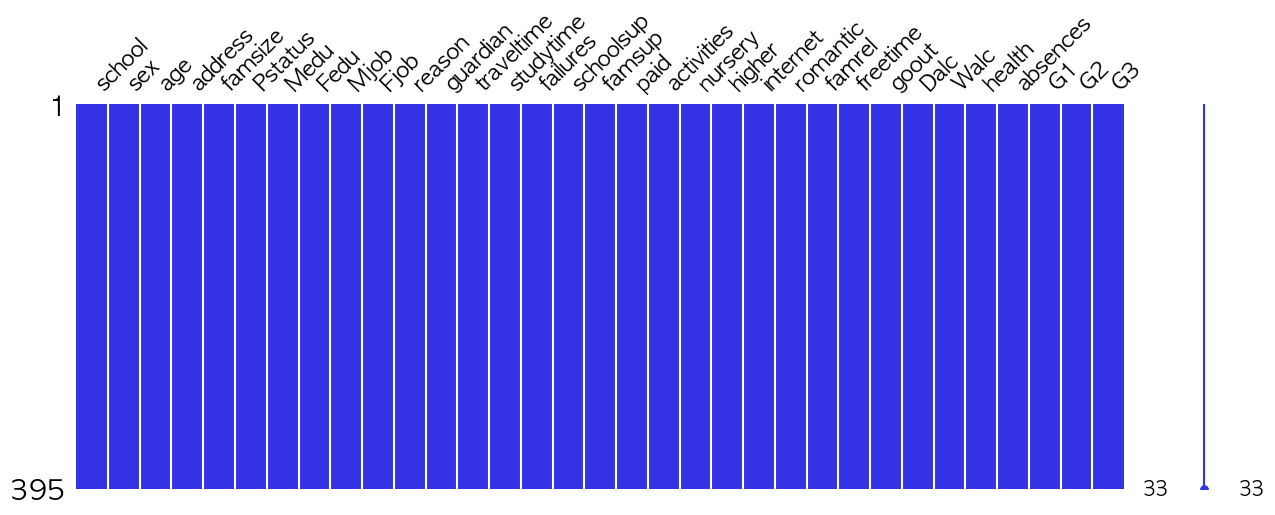

In [7]:
msno.matrix(df=mat_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5));

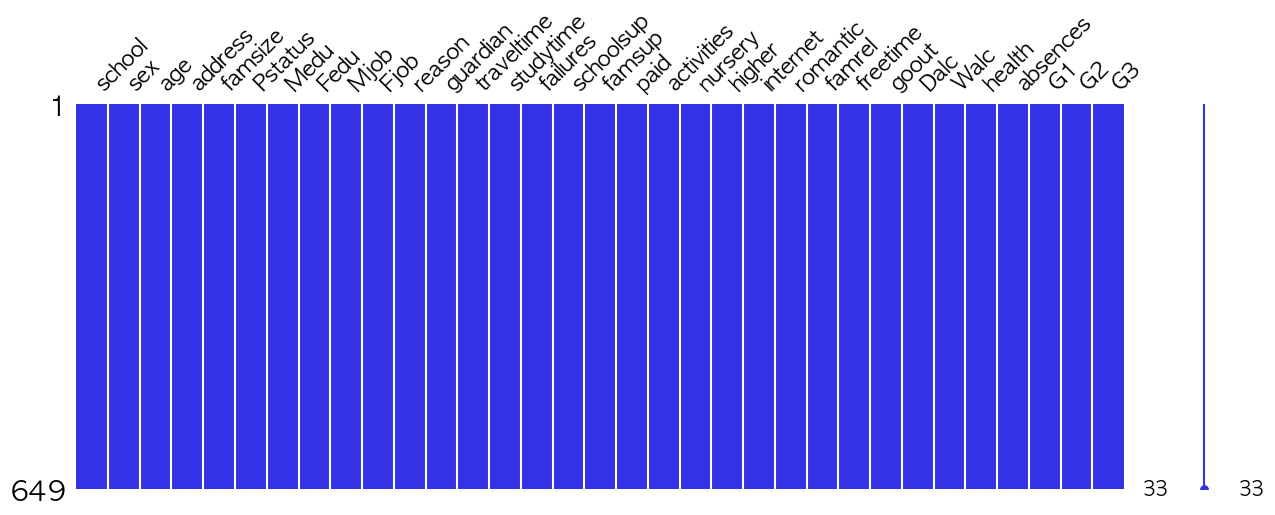

In [8]:
msno.matrix(df=pot_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5));

## (2) 데이터 전처리

In [9]:
# 수학: M, 포르투갈어: P
mat_eda_df['subject'] = 'M'
pot_eda_df['subject'] = 'P'

In [10]:
concat_df = pd.concat([mat_eda_df, pot_eda_df], axis=0)

In [11]:
# Dalc 컬럼을  Dalc와 Walc의 평균으로 재조정
concat_df['Malc'] = (concat_df['Dalc'] + concat_df['Walc']) / 2
concat_df.drop(['Dalc','Walc'], axis=1, inplace=True)

In [12]:
concat_df['Agrade'] = (concat_df['G1'] + concat_df['G2'] + concat_df['G3']) / 3
concat_df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [13]:
concat_df.reset_index(inplace=True)
concat_df.drop('index', axis=1, inplace=True)

In [14]:
#concat_df.drop('level_0', axis=1, inplace=True)

In [15]:
concat_df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      reason guardian  traveltime  studytime  failures  ... famsup paid  \
0     course   mother           2          2         0  ...     no   no   
1     course   father           1          2         0  ...    yes   no   
2      other   mother           1          2         3  ...     no  yes   
3       home   mother           1          3         0  ...    yes  yes   
4       home   father           1          2         0  ...    yes  yes   
...      ...      ...         ...        ...       ...  ...    ...  ...   
1039  course   mother           1          3         1  ...     no   no   
1040  course   mother           1          2         0  ...    yes   no   
1041  course   mother           2          2         0  ...     no   no   
1042  course   mother           2          1         0  ...     no   no   
1043  course   mother           3          1         0  ...     no   no   

     activities nursery higher internet romantic famrel  freetime  goout  \
0            no     yes    yes       no       no      4         3      4   
1            no      no    yes      yes       no      5         3      3   
2            no     yes    yes      yes       no      4         3      2   
3           yes     yes    yes      yes      yes      3         2      2   
4            no     yes    yes       no       no      4         3      2   
...         ...     ...    ...      ...      ...    ...       ...    ...   
1039        yes      no    yes      yes       no      5         4      2   
1040         no     yes    yes      yes       no      4         3      4   
1041        yes     yes    yes       no       no      1         1      1   
1042         no      no    yes      yes       no      2         4      5   
1043         no      no    yes      yes       no      4         4      1   

      health  absences  subject Malc  Agrade  
0          3         6        M 1.00    5.67  
1          3         4        M 1.00    5.33  
2          3        10        M 2.50    8.33  
3          5         2        M 1.00   14.67  
4          5         4        M 1.50    8.67  
...      ...       ...      ...  ...     ...  
1039       5         4        P 1.50   10.33  
1040       1         4        P 1.00   15.33  
1041       5         6        P 1.00   10.67  
1042       2         6        P 3.50   10.00  
1043       5         4        P 3.50   10.67  

[1044 rows x 31 columns]

# Ⅱ. 데이터 분석 및 시각화

### 범주형 컬럼 : df_mat.column.unique()

1. school : 'GP', 'MS'
2. sex : 'F', 'M'
3. address : 'U', 'R'
4. famsize : 'GT3', 'LE3'
5. Pstatus : 'A', 'T'
6. Mjob : 'at_home', 'health', 'other', 'services', 'teacher'
7. Fjob : 'teacher', 'other', 'services', 'health', 'at_home'
8. reason : 'course', 'other', 'home', 'reputation'
9. guardian : 'mother', 'father', 'other'
10. schoolsup : 'yes', 'no'
11. famsup : 'no', 'yes'
12. paid : 'no', 'yes'
13. activities : 'no', 'yes'
14. nursery : 'yes', 'no'
15. higher : 'yes', 'no'
16. internet : 'no', 'yes'
17. romantic : 'no', 'yes'

### 상관관계

In [16]:
from dython.nominal import identify_nominal_columns
cat_featrues = identify_nominal_columns(mat_eda_df)
cat_featrues

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'subject']

### 수학 성적 데이터 상관관계

In [17]:
from dython.nominal import associations

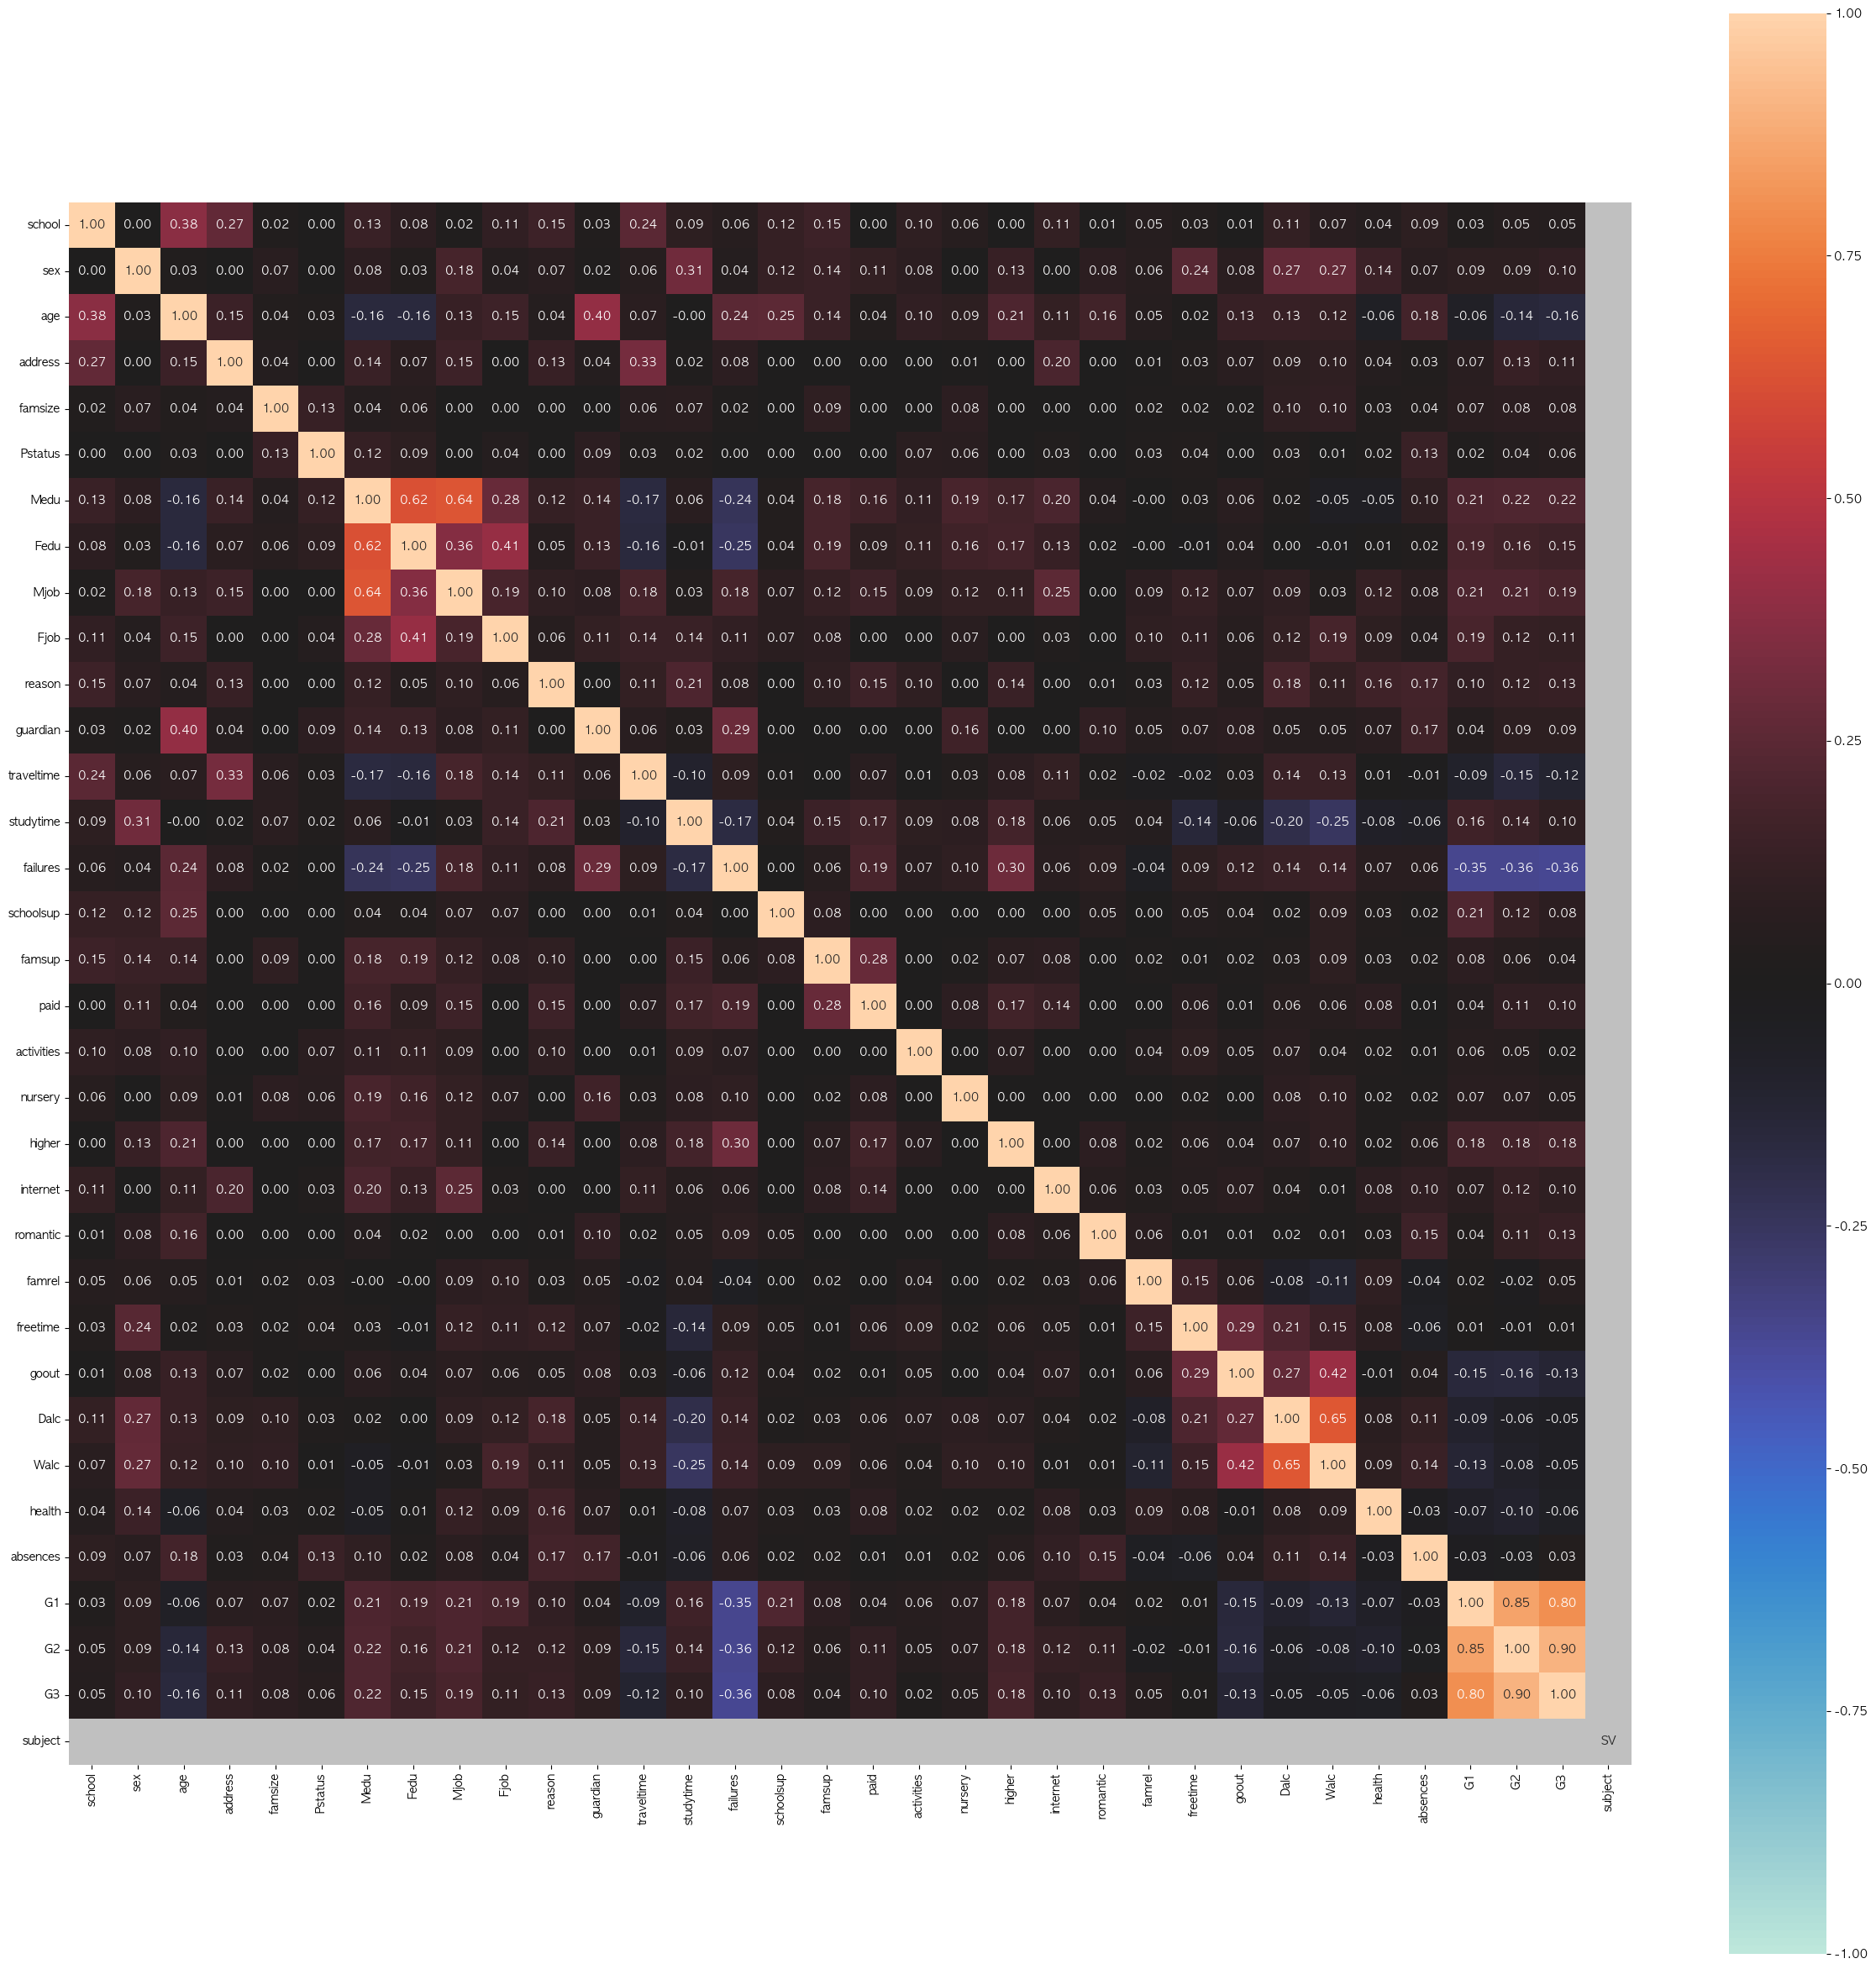

In [18]:
# 수학 성적 데이터 상관관계
complete_correlation = associations(mat_eda_df, filename='mat_correlation.png', figsize=(30, 30))

In [19]:
# Dalc과 feature 간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

In [20]:
# 오름차순으로 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [21]:
# 전체 상관관계 출력
px.bar(corr_df, x='Dalc')

### 포르투갈어 성적 데이터 상관관계

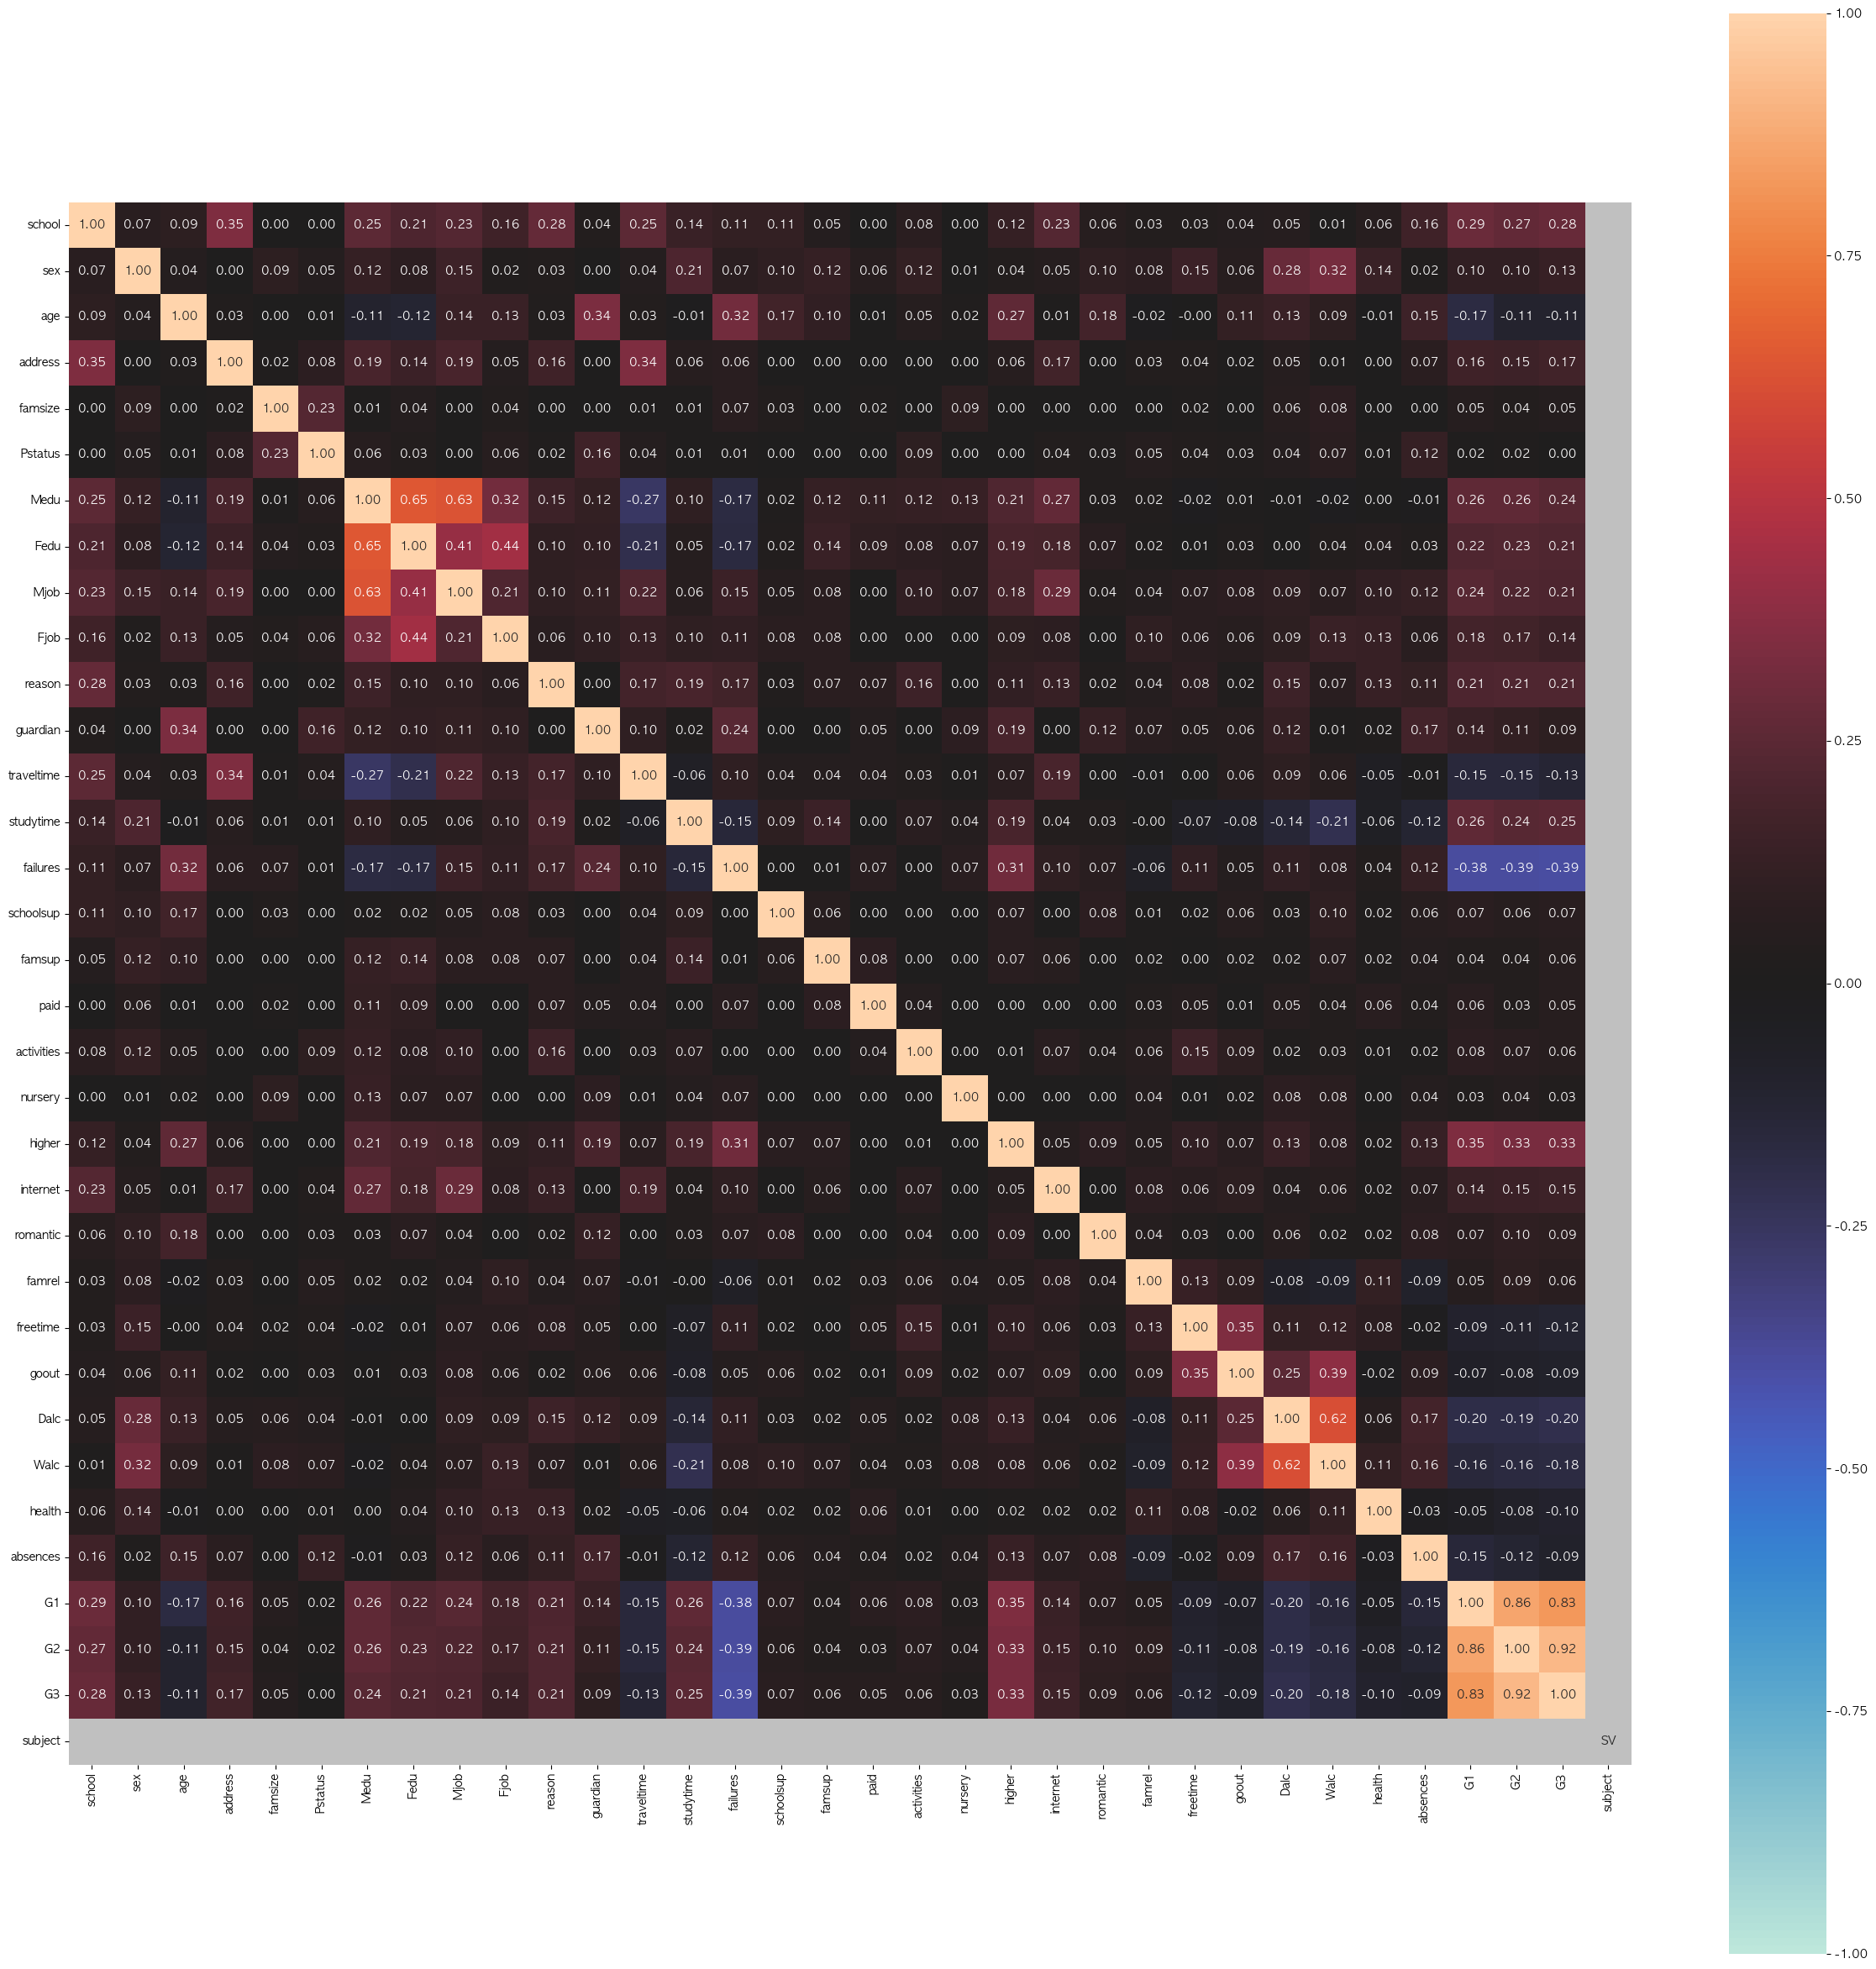

In [22]:
# 포르투갈어 성적 데이터 전체 상관관계 히트맵
complete_correlation = associations(pot_eda_df, filename='mat_correlation.png', figsize=(30, 30))

In [23]:
# Dalc와 featurer간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [24]:
# 상관관계 오름차순 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [25]:
px.bar(corr_df, x='Dalc')

### 수학 성적 데이터와 포르투갈어 성적 데이터를 합친 상관관계

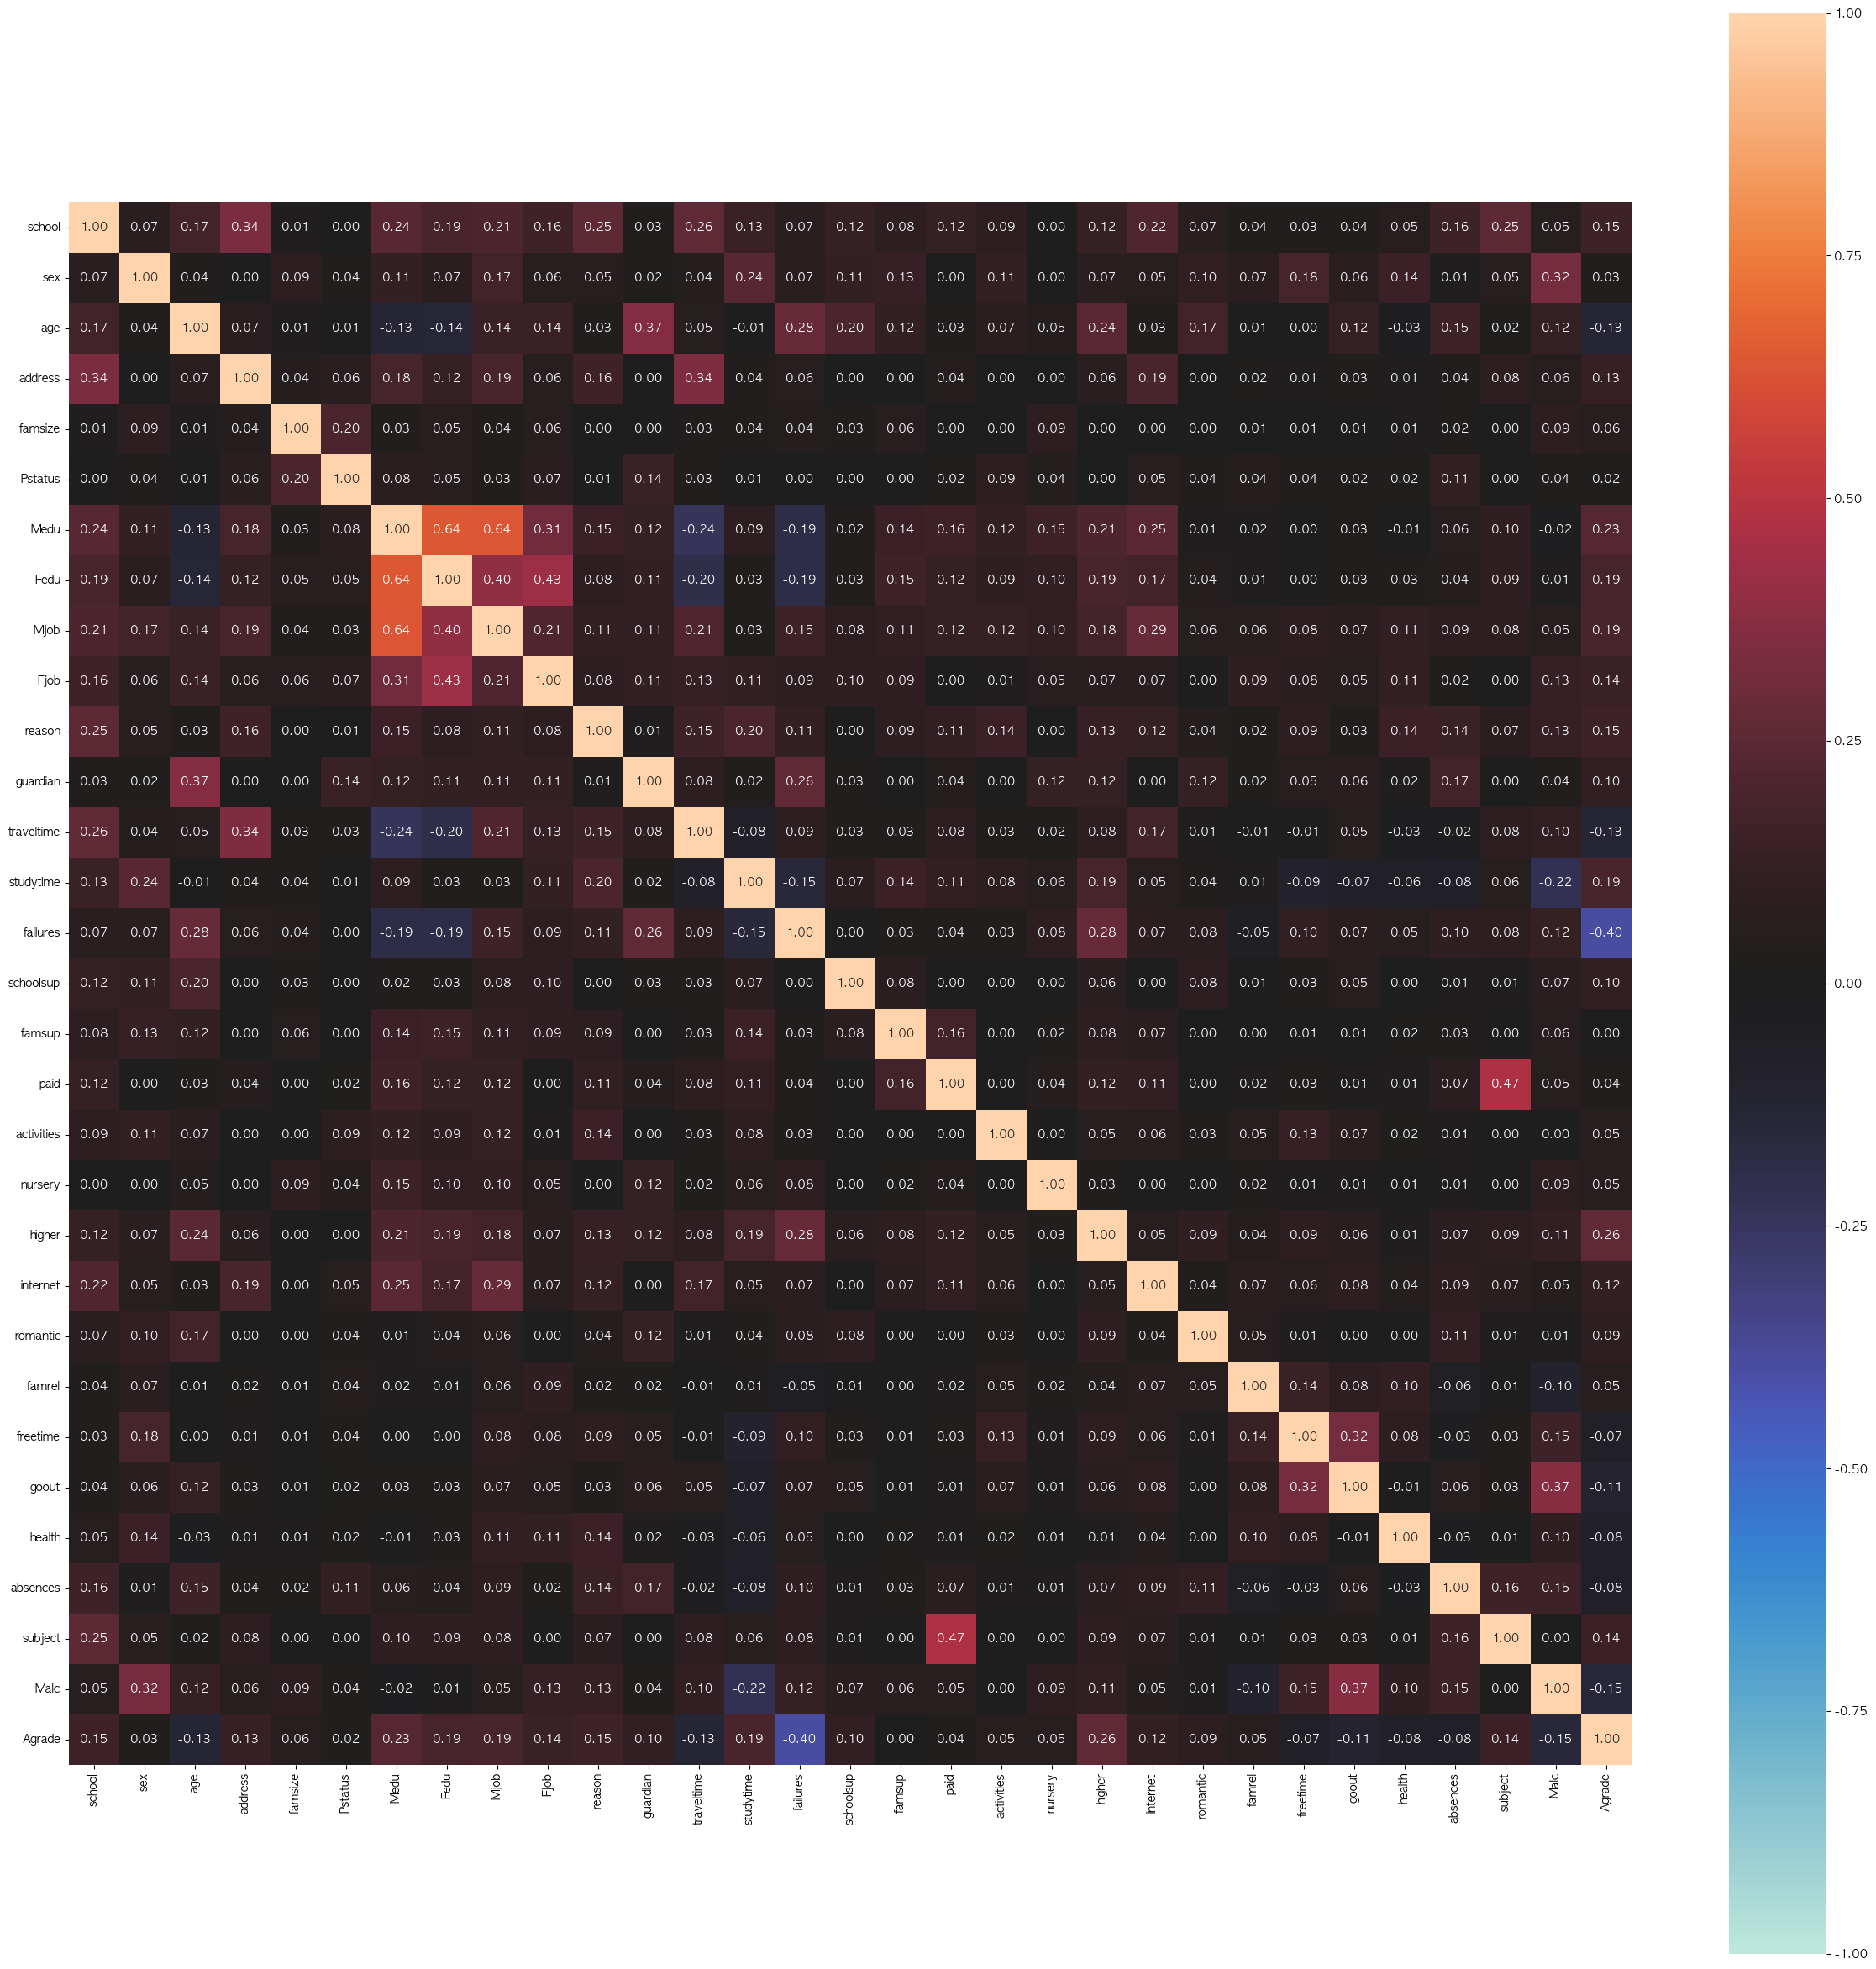

In [26]:
complete_correlation = associations(concat_df, filename='concat_corr.png', figsize=(30, 30))

In [27]:
corr_df = complete_correlation['corr'].sort_values(by='Malc', ascending=False)

In [28]:
px.bar(corr_df, x='Malc')

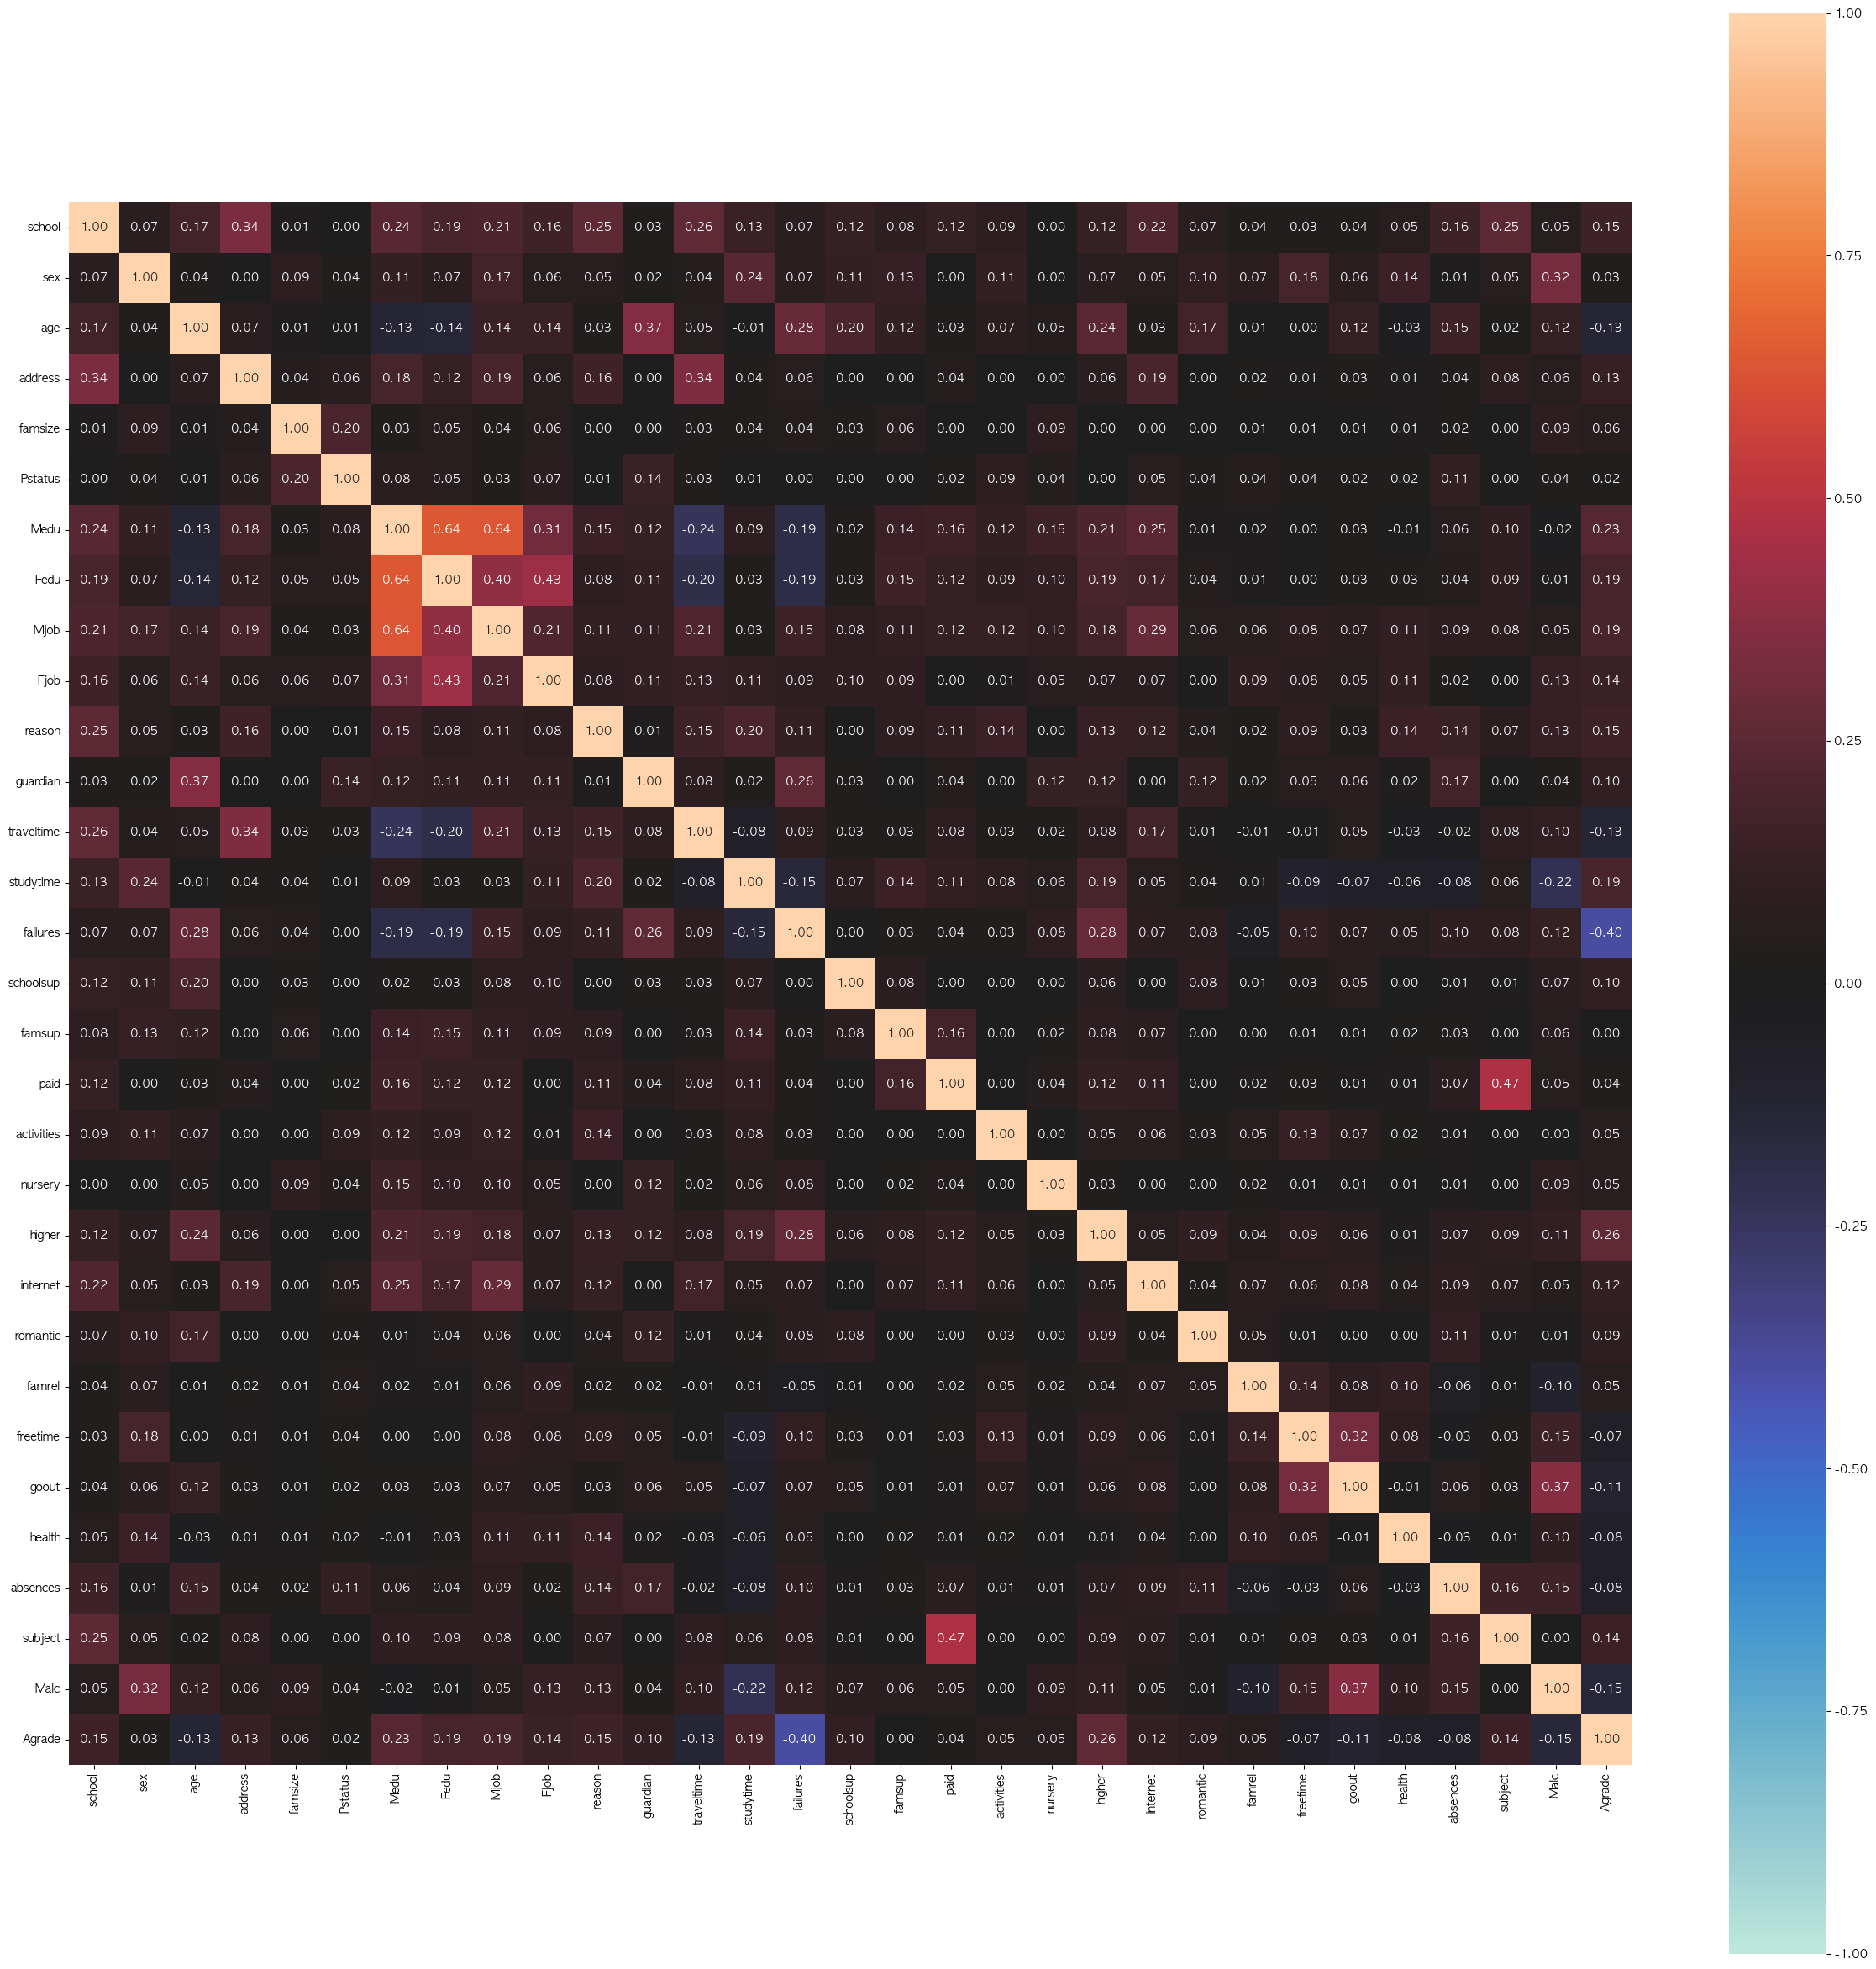

In [29]:
complete_correlation = associations(concat_df, filename='concat_corr2.png', figsize=(30, 30))

In [30]:
complete_correlation['corr'].sort_values(by='Malc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

In [31]:
px.bar(corr_df, x='Malc')

In [32]:
# 상관계수를 절대값을 해준 후 데이터 프레임 만들기 (: 음의 상관관계도 포함하기 위해서)
abs_df = corr_df.Malc.abs().to_frame('corr_score').corr_score.nlargest(31).to_frame('score')
abs_df.reset_index(inplace=True)
choice_col_list_df = abs_df.head(17)
choice_col_list_df

index  score
0         Malc   1.00
1        goout   0.37
2          sex   0.32
3    studytime   0.22
4       Agrade   0.15
5     absences   0.15
6     freetime   0.15
7         Fjob   0.13
8       reason   0.13
9          age   0.12
10    failures   0.12
11      higher   0.11
12  traveltime   0.10
13      famrel   0.10
14      health   0.10
15     famsize   0.09
16     nursery   0.09

---

### 최종 상관계수

In [33]:
Malc_df = corr_df[['Malc']]
Malc_df.reset_index(inplace=True)
pos_14_corr_df = Malc_df.head(14)
neg_4_corr_df = Malc_df.tail(3)
most_corr_df= pd.concat([pos_14_corr_df, neg_4_corr_df],axis=0)
most_corr_df.columns = ['features', 'score']
most_corr_df.reset_index(inplace=True)
most_corr_df.drop('index', inplace=True, axis=1)
most_corr_df

features  score
0         Malc   1.00
1        goout   0.37
2          sex   0.32
3     absences   0.15
4     freetime   0.15
5         Fjob   0.13
6       reason   0.13
7          age   0.12
8     failures   0.12
9       higher   0.11
10  traveltime   0.10
11      health   0.10
12     famsize   0.09
13     nursery   0.09
14      famrel  -0.10
15      Agrade  -0.15
16   studytime  -0.22

---

- 용정 : 'failures', 'freetime', 'Fjob', AGrade
- 종호 : 'studytime', 'sex', 'age', 'reason'
- 정원 : 'goout', 'absences', 'fjob' / 'famrel'

### 범주형 변수를 수치형 변수로 변환하기

In [34]:
def init_mapping(data, col_ls):
    """_summary_

    Args:
        data (DataFrame): 변환하고자 하는 데이터 프레임
        col_name (list): 변환하고 하자는 데이터 프레임의 컬럼명을 리스트로 input
    """
    print('Start Mapping.......')
    print('-' * 50)
    for i in range(len(col_ls)):
        data_ls = data[col_ls[i]].unique()
        print('column name :', col_ls[i])
        num = []
        if len(data_ls) == 2:
            num = [i for i in range(len(data_ls))] # 번호 생성
        else:
            num = [i + 1 for i in range(len(data_ls))]
        ls = [(data_ls[i], num[i]) for i in range(len(data_ls))] # 해당 컬럼의 데이터 와 번호 리스트로 생성
        print(ls)
        mapping = dict(ls) # dict로 만듬
        data[col_ls[i]] = data[col_ls[i]].apply(lambda x: mapping[x]) # mapping 적용

In [35]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [36]:
# Fjob은 unique의 순서가 달라 따로 맵핑함
mapping = {
    'at_home' : 1,
    'health' : 2,
    'other' : 3, 
    'services': 4,
    'teacher' : 5
}
concat_df['Fjob'] = concat_df['Fjob'].apply(lambda x: mapping[x])

In [37]:
mapping = {
    'yes' : 1,
    'no' :0
}
concat_df['schoolsup'] = concat_df['schoolsup'].apply(lambda x: mapping[x])
concat_df['nursery'] = concat_df['nursery'].apply(lambda x: mapping[x])
concat_df['higher'] = concat_df['higher'].apply(lambda x: mapping[x])

In [38]:
col_ls = [
    'school', 'sex', 'address', 'famsize', 
    'Pstatus', 'Mjob', 'reason', 'guardian', 
    'famsup', 'paid', 'activities', 'internet', 
    'romantic', 'subject'
    ]

In [39]:
init_mapping(concat_df, col_ls)

Start Mapping.......
--------------------------------------------------
column name : school
[('GP', 0), ('MS', 1)]
column name : sex
[('F', 0), ('M', 1)]
column name : address
[('U', 0), ('R', 1)]
column name : famsize
[('GT3', 0), ('LE3', 1)]
column name : Pstatus
[('A', 0), ('T', 1)]
column name : Mjob
[('at_home', 1), ('health', 2), ('other', 3), ('services', 4), ('teacher', 5)]
column name : reason
[('course', 1), ('other', 2), ('home', 3), ('reputation', 4)]
column name : guardian
[('mother', 1), ('father', 2), ('other', 3)]
column name : famsup
[('no', 0), ('yes', 1)]
column name : paid
[('no', 0), ('yes', 1)]
column name : activities
[('no', 0), ('yes', 1)]
column name : internet
[('no', 0), ('yes', 1)]
column name : romantic
[('no', 0), ('yes', 1)]
column name : subject
[('M', 0), ('P', 1)]


In [40]:
concat_df.head(10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0    0   18        0        0        0     4     4     1     5   
1       0    0   17        0        0        1     1     1     1     3   
2       0    0   15        0        1        1     1     1     1     3   
3       0    0   15        0        0        1     4     2     2     4   
4       0    0   16        0        0        1     3     3     3     3   
5       0    1   16        0        1        1     4     3     4     3   
6       0    1   16        0        1        1     2     2     3     3   
7       0    0   17        0        0        0     4     4     3     5   
8       0    1   15        0        1        0     3     2     4     3   
9       0    1   15        0        0        1     3     4     3     3   

   reason  guardian  traveltime  studytime  failures  ...  famsup  paid  \
0       1         1           2          2         0  ...       0     0   
1       1         2           1          2         0  ...       1     0   
2       2         1           1          2         3  ...       0     1   
3       3         1           1          3         0  ...       1     1   
4       3         2           1          2         0  ...       1     1   
5       4         1           1          2         0  ...       1     1   
6       3         1           1          2         0  ...       0     0   
7       3         1           2          2         0  ...       1     0   
8       3         1           1          2         0  ...       1     1   
9       3         1           1          2         0  ...       1     1   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0           0        1       1         0         0       4         3      4   
1           0        0       1         1         0       5         3      3   
2           0        1       1         1         0       4         3      2   
3           1        1       1         1         1       3         2      2   
4           0        1       1         0         0       4         3      2   
5           1        1       1         1         0       5         4      2   
6           0        1       1         1         0       4         4      4   
7           0        1       1         0         0       4         1      4   
8           0        1       1         1         0       4         2      2   
9           1        1       1         1         0       5         5      1   

   health  absences  subject  Malc  Agrade  
0       3         6        0  1.00    5.67  
1       3         4        0  1.00    5.33  
2       3        10        0  2.50    8.33  
3       5         2        0  1.00   14.67  
4       5         4        0  1.50    8.67  
5       5        10        0  1.50   15.00  
6       3         0        0  1.00   11.67  
7       1         6        0  1.00    5.67  
8       1         0        0  1.00   17.67  
9       5         0        0  1.00   14.67  

[10 rows x 31 columns]

In [41]:
# concat_df.to_csv('~/git/hakcerton/data/preprocessing/final_data.csv', index=False)

### 상관관계 vs. 인과관계

상관관계(correlation)를 인과관계(causation)와 또는 인과관계를 예측하는 것과 혼동하지 않는 것이 중요하다. 변수 x는 변수 y를 예측할 때 유용할 수 있습니다만, 이것이  x가 y의 원인이 된다는 의미는 아니다. x가 y의 원인이 될 수 있지만, y가 x의 원인이 될 수도 있고, 또는 둘 사이의 관계는 단순한 인과관계보다 더 복잡할 수 있다.

예를 들면, 매달 해변 리조트에서 물에 빠져 죽은 횟수를 해당 기간에 팔린 아이스크림 수와 함께 모델링 할 수 있는데, 이 모델이 그럴듯한 예측값을 줄 수 있다. 그 이유는 아이스크림 때문에 물에 빠져 죽기 때문이 아니라, 더운 날에 사람들이 아이스크림을 더 많이 먹고 더운 날에 수영을 할 가능성도 높기 때문이다. 따라서 두 변수(아이스크림 판매량과 물에 빠져 죽는 것)가 상관관계가 있지만, 하나가 다른 하나의 원인인 것은 아니다. 두 가지 변수 모두 제 3의 변수인 기온이 원인이다. 이것이 바로 생략된 변수가 반응변수(response variable)와 적어도 하나 이상의 예측 변수(predictor variable) 모두에 영향을 미치는 “혼선(confounding)”의 예이다.

두 변수 사이에 상관관계가 없을 때나 모델과는 반대로 인과관계(causality)가 성립할 때도, 또는 혼선(confounding)이 있더라도, 상관관계(correlations)가 예측 작업에서는 유용하다는 것을 이해하는 것이 중요합니다.

하지만, 인과관계를 결정할 수 있으면, 종종 더 나은 모델이 가능합니다. 이 예제에서, 아이스크림 판매량과 물에 빠져 죽는 것은 온도와 해변 리조트에 방문하는 사람 숫자에 영향을 받을 것입니다. 다시 한번 강조하지만, 높은 기온 때문에 실제로 사람이 죽는 것은 아니지만, 이러한 변수는 사람이 왜 수영을 하는지와 더욱 직접적으로 관련이 있다. 따라서 물에 빠져 죽는 것에 대한 더 나은 모델에는 아마도 온도, 방문자 수가 들어가고 아이스크림 판매량이 빠질 것이다.

[1] https://otexts.com/fppkr/causality.html

### Q) 알콜섭취량(Malc)와 평균성적(Agrade)은 상관관계가 있는 것인가? 아니면 인과관계가 있는 것인가?

위에서 설명한 것처럼 School Alcohol Consumption의 변수를 놓고 상관관계와 인과관계에 대해 논의해 볼 수 있다. 알콜섭취량(Malc)과 평균성적(Agrade)을 제외한 나머지 변수(the rest)를 독립변수로 놓고, 알콜섭취량(Malc)와 평균성적(Agrade)을 종속변수로 놓자.

'goout', 'sex', 'absences', 'freetime', 'studytime' 등이 종속변수와 상관관계가 높은 변수들인데 이 변수들이 알콜섭취량(Malc)에 영향을 미치고 또 평균성적(Agrade)에 영향을 미친다고 해서, 알콜섭취량(Malc)과 평균성적(Agrade)이 하나가 다른 하나의 원인인 인과관계에 있는 것은 아니다. 
두 변수는 상관관계가 있는 것이고 나머지 변수들이 이 두 변수의 원인인 것이다.


* 상관관계 : 알콜섭취량(Malc)과 평균성적(Agrade)

  - The rest는 알콜섭취량(Malc)에 영향을 미친다. 

  - The rest는 평균성적(Agrade)에 영향을 미친다.

  - → 알콜섭취량(Malc)와 평균성적(Agrade)는 상관관계가 있다.


* cf) 인과관계 : 알콜섭취량(Malc) → 평균성적(Agrade)

  - The rest는 알콜섭취량(Malc)에 영향을 미친다. 
  
  - 알콜섭취량(Malc)은 평균성적(Agrade)에 영향을 미친다.

  - → 알콜섭취량(Malc)과 평균성적(Agrade)는 인과관계가 있다.


In [42]:
pd.options.display.max_columns = None
concat_df.head(0)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, absences, subject, Malc, Agrade]
Index: []

In [43]:
df_new = concat_df.iloc[:, [25, 27, 9, 23, 29]]
df_new.head()

goout  absences  Fjob  famrel  Malc
0      4         6     5       4  1.00
1      3         4     3       5  1.00
2      2        10     3       4  2.50
3      2         2     4       3  1.00
4      2         4     3       4  1.50

#### * gouout (0.37)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Malc - alcohol consumption per week (numeric: from 1 - very low to 5 - very high)

In [91]:
print(concat_df.goout.unique())
print(concat_df.Malc.unique())

[4 3 2 1 5]
[1.  2.5 1.5 2.  3.  5.  3.5 4.  4.5]


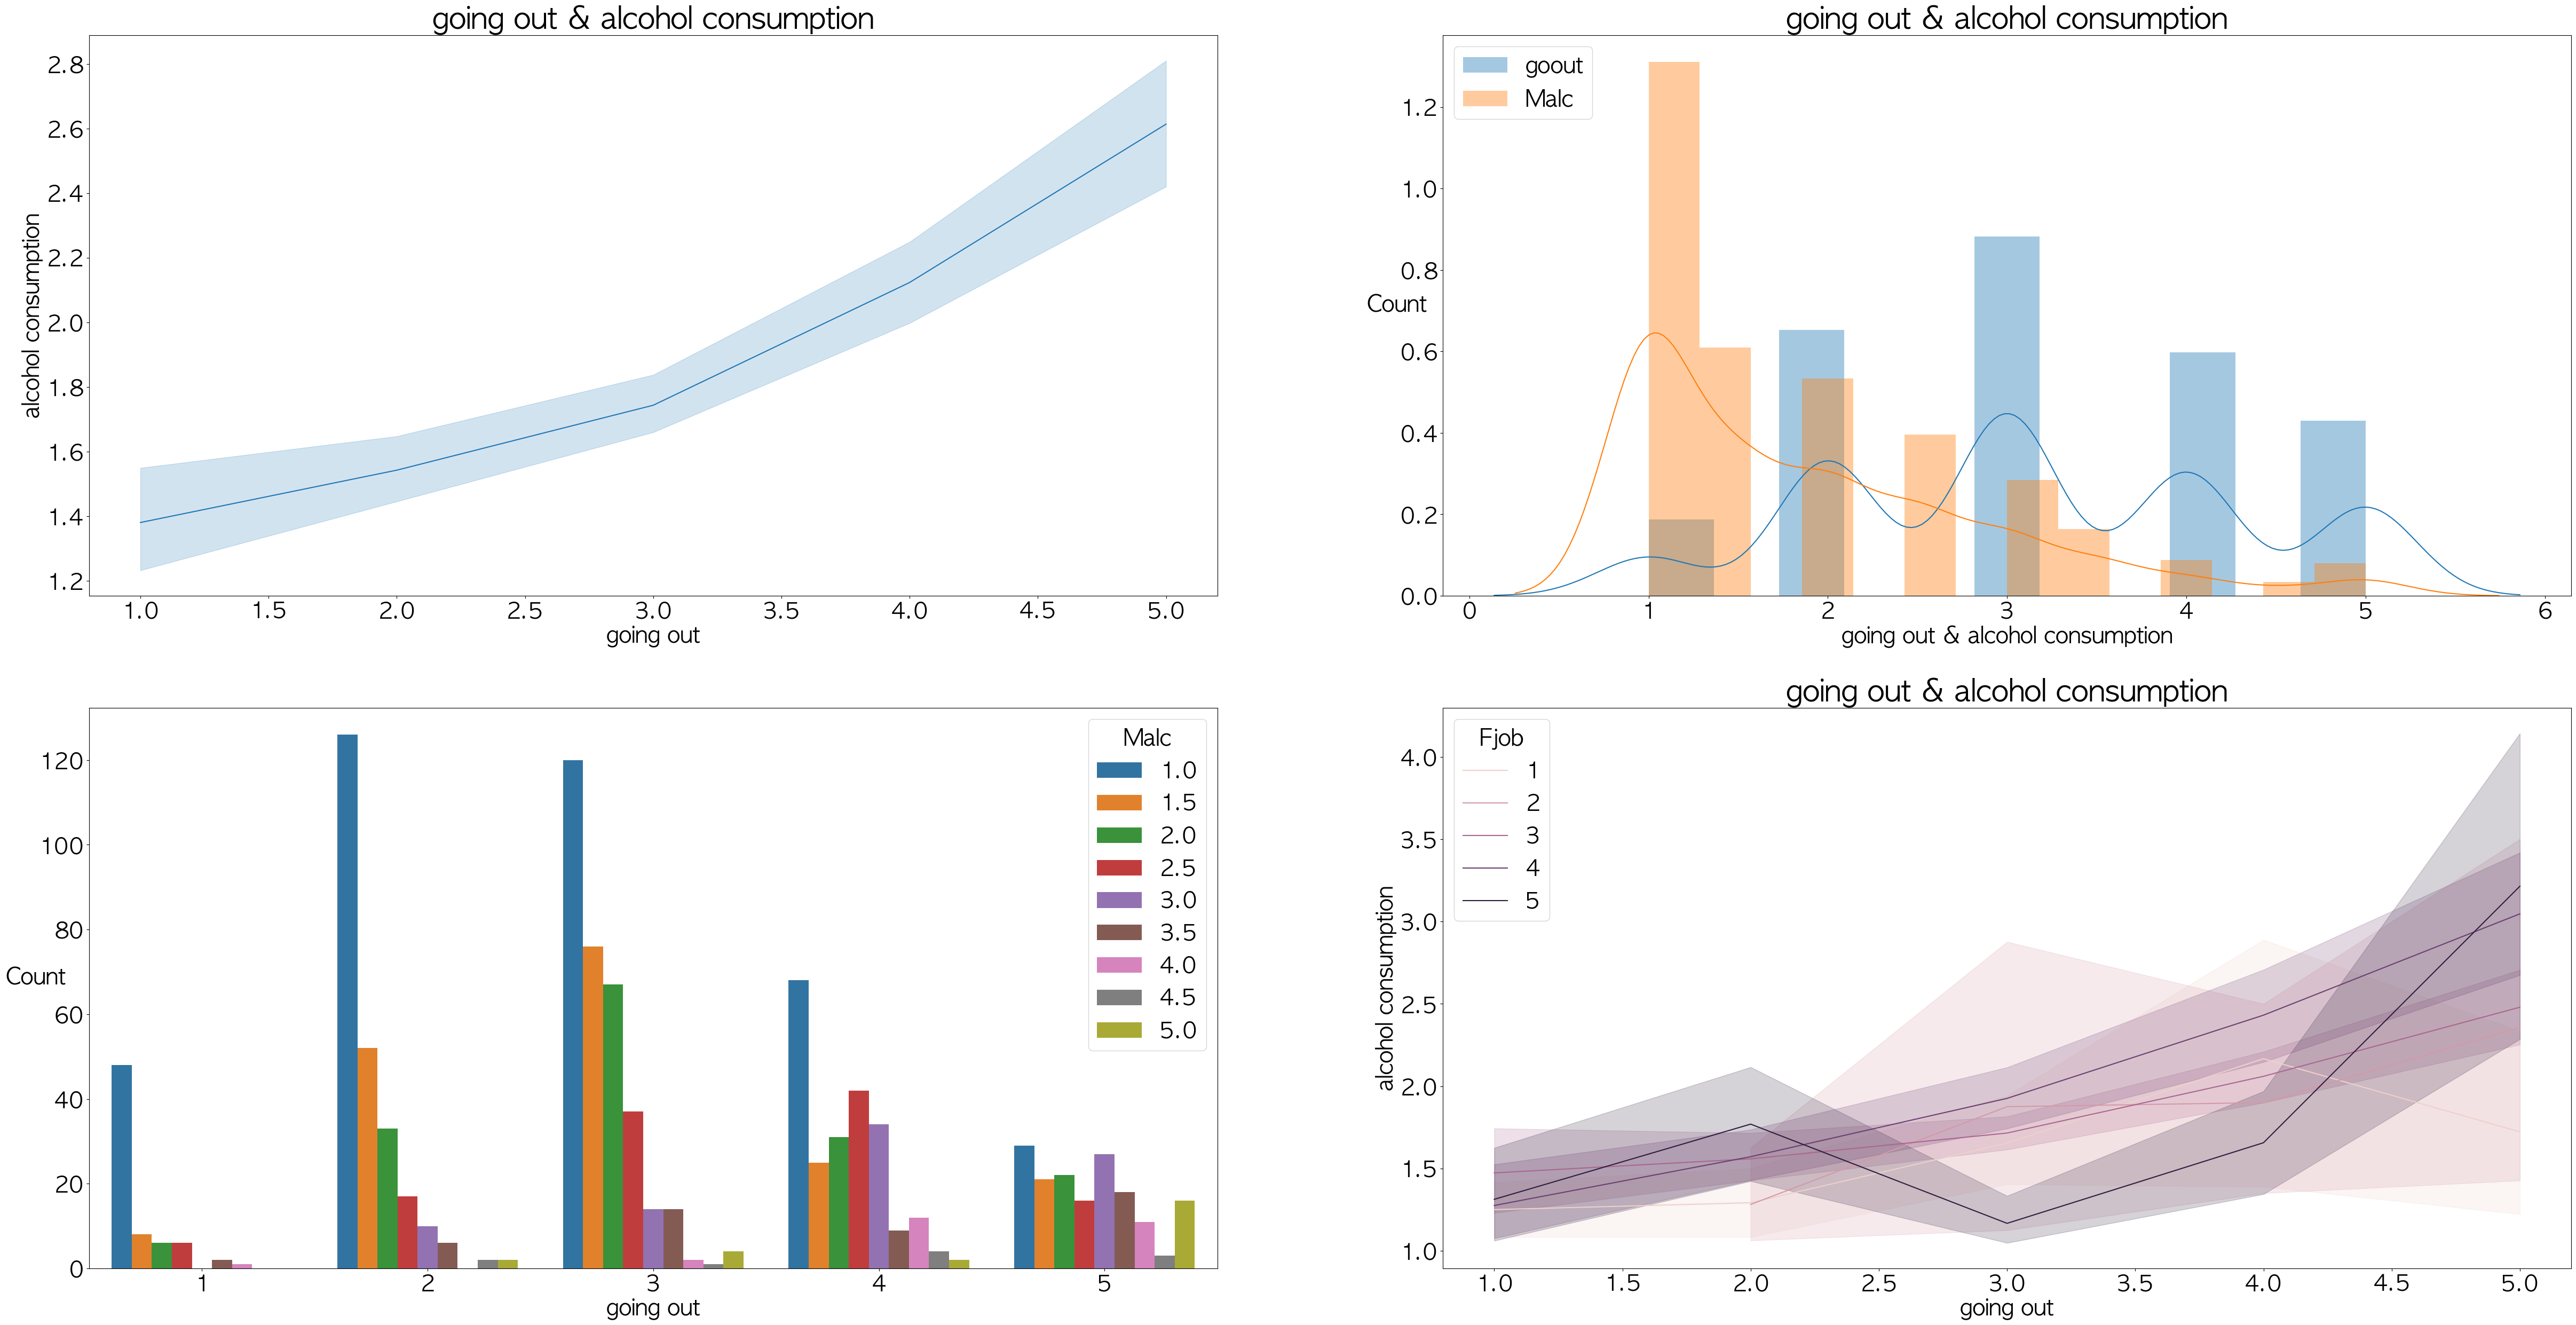

In [95]:
plt.figure(figsize = (60, 30))

plt.subplot(221)
sns.lineplot(data=concat_df, x='goout', y='Malc')
plt.title('going out & alcohol consumption', size=40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('going out', fontsize = 30)
plt.ylabel('alcohol consumption', fontsize = 30)

plt.subplot(222)
sns.distplot(concat_df['goout'], label='goout')
sns.distplot(concat_df['Malc'], label='Malc')
plt.title('going out & alcohol consumption', size=40)
plt.legend(loc='upper left', fontsize=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('going out & alcohol consumption', fontsize = 30)
plt.ylabel('Count', rotation=0, fontsize = 30)

plt.subplot(223)
sns.countplot(data=concat_df, x='goout', hue='Malc')
# plt.title('go out & alcohol consumption', size=40)
plt.legend(loc='upper right', fontsize=30, title='Malc', title_fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('going out', fontsize = 30)
plt.ylabel('Count', rotation=0, fontsize = 30)

plt.subplot(224)
sns.lineplot(data=concat_df, x='goout', y='Malc', hue='Fjob')
plt.title('going out & alcohol consumption', size=40)
plt.legend(loc='upper left', fontsize=30, title='Fjob', title_fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('going out', fontsize = 30)
plt.ylabel('alcohol consumption', fontsize = 30)

plt.show()

going out(goout)과 alcohol consumption(Malc) 간에는 양의 상관관계 (상관계수 0.37)가 있다. 

1. 첫 번째 그래프는 단순히 주당 외출 횟수와 주당 음주 횟수의 비례 관계를 보여주고 있다.  

2. 그러나 두 번째 그래프를 살펴보면 두 변수의 관련성을 좀 더 자세히 살펴볼 수 있다.
먼저 두 번째 그래프는 going out과 alcohol consumption의 횟수를 각각 displot으로 비교하고 있다. 
going out은 정규분포의 형태를 보이고 있으며, 주당 음주 횟수는 1번을 기준으로 점차 적어지고 있다. 
오히려 주1회 친구와 외출시의 알콜 소비량이 제일 많으며 외출 횟수가 늘어날수록 알콜 소비량이 점차 적어지고 있다.
이는 주1회 외출시 친구와 술 약속을 잡을 확률이 크고, 외출 횟수가 늘어날수록 친구와 술 약속이 아닌 다른 약속을 잡을 확률이 커짐을 의미한다.

3. 세 번째 

4. 

 

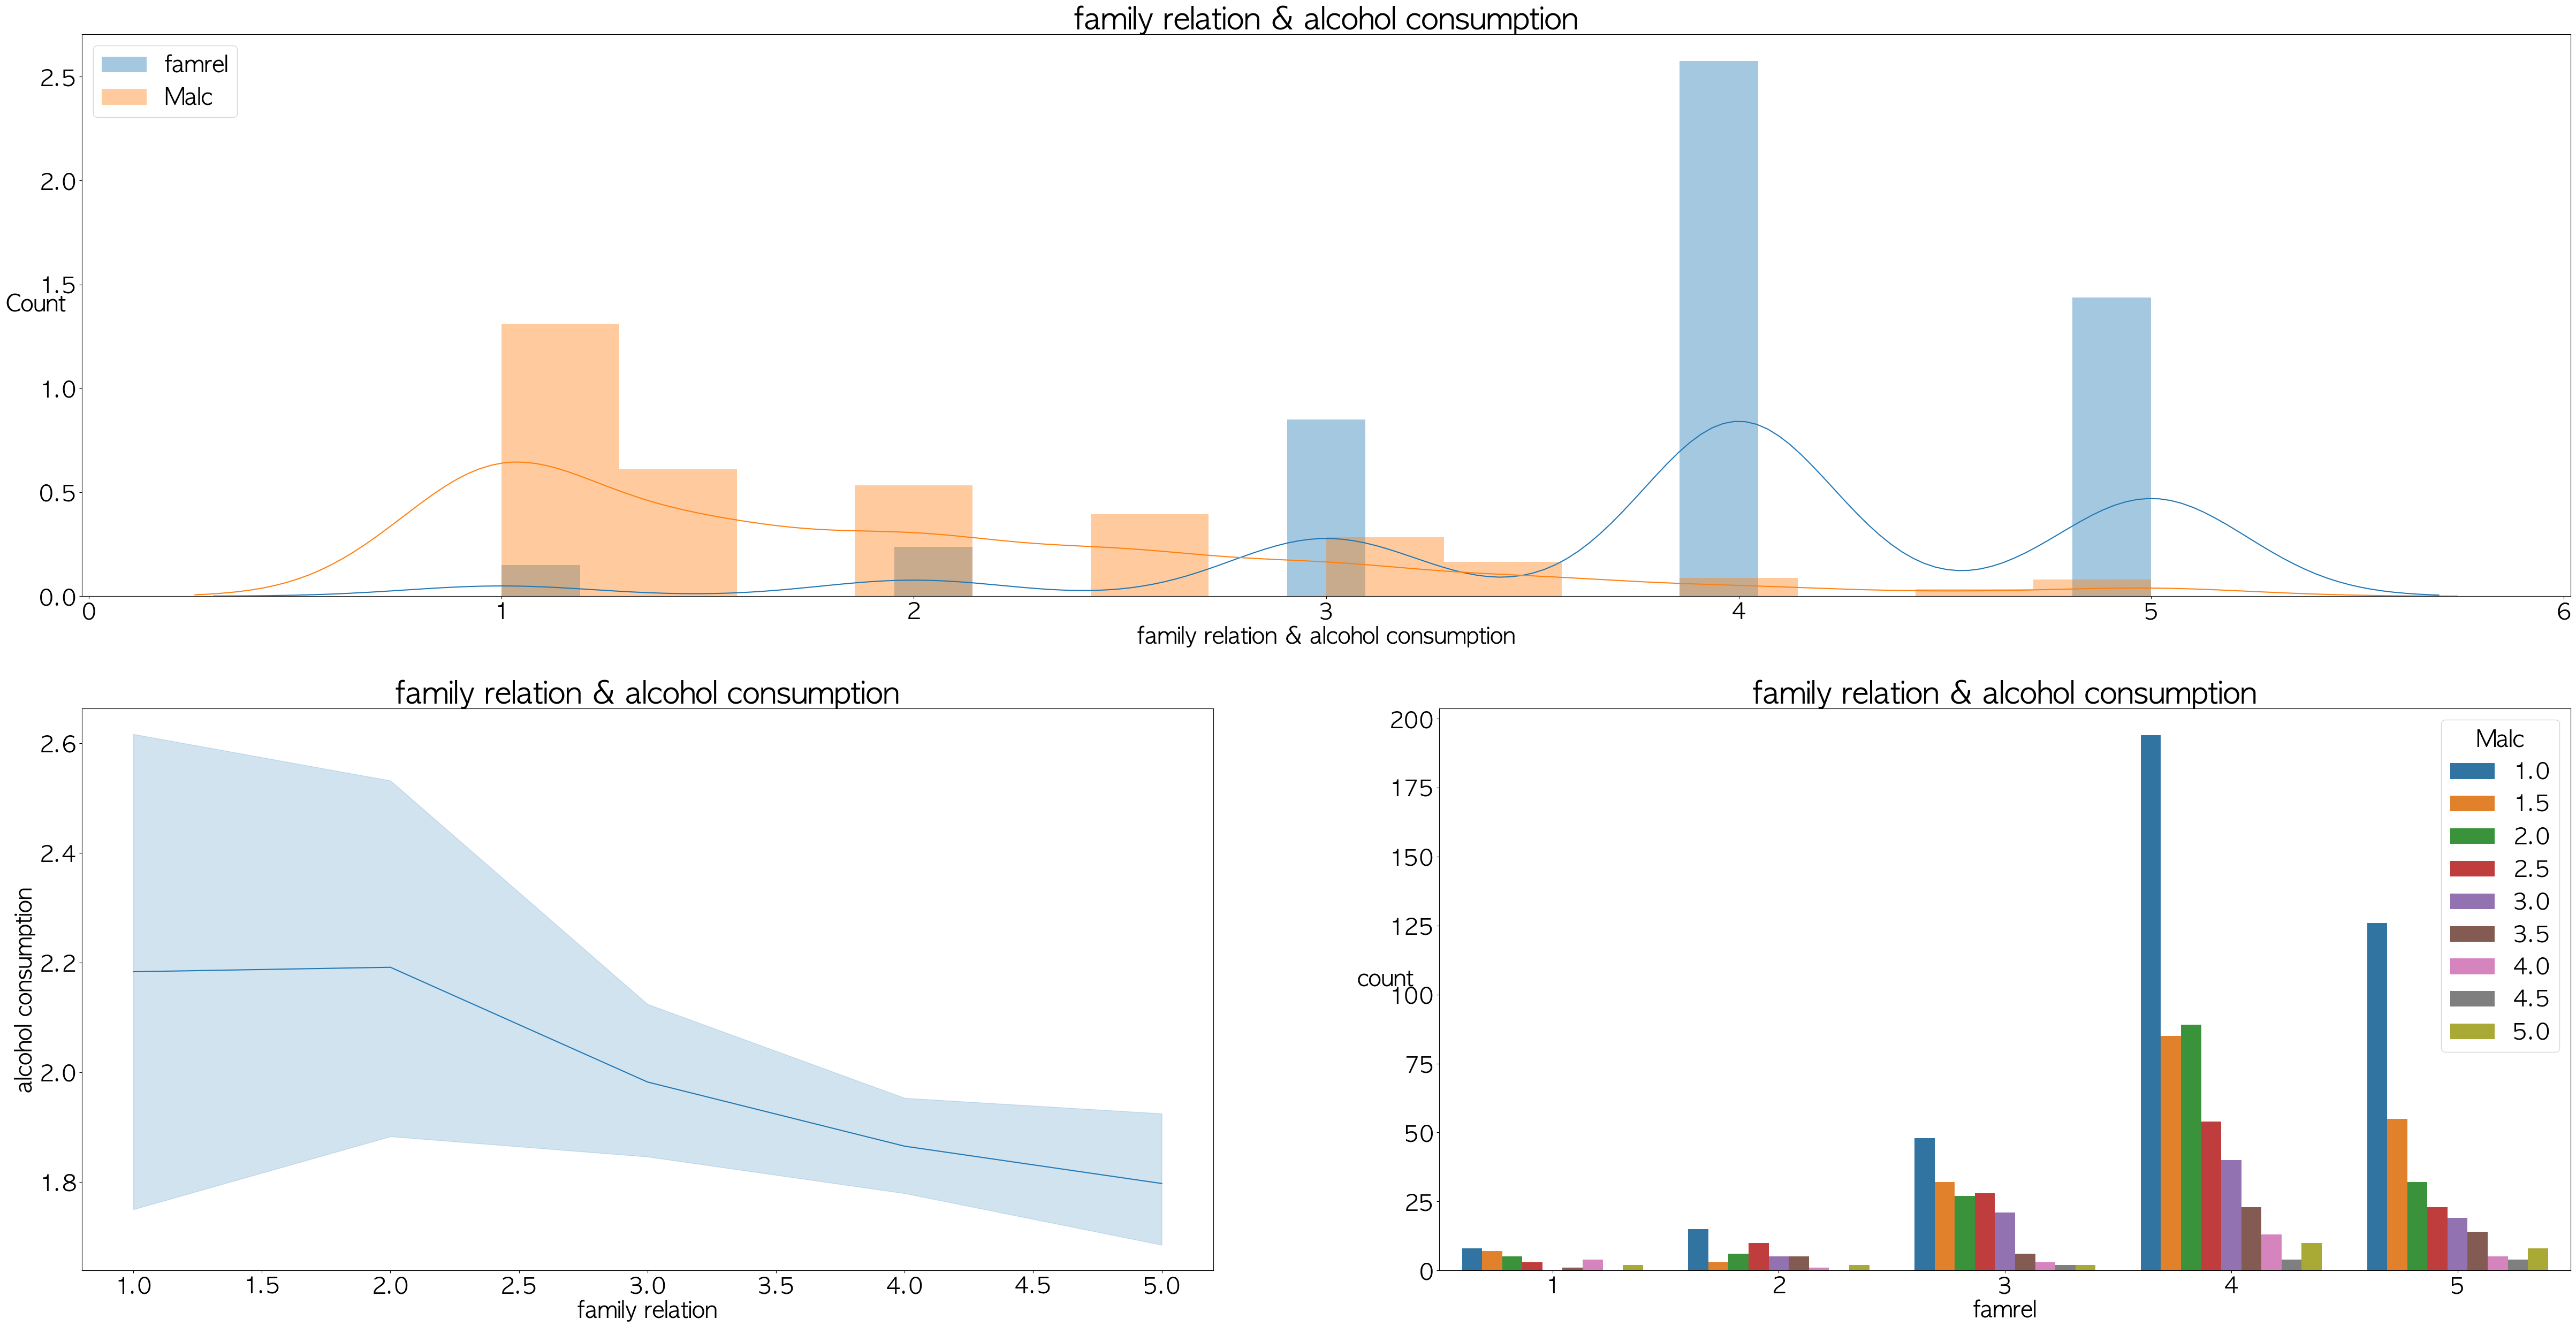

In [83]:
plt.figure(figsize = (60, 30))

plt.subplot(211)
sns.distplot(concat_df['famrel'], label='famrel')
sns.distplot(concat_df['Malc'], label='Malc')
plt.title('family relation & alcohol consumption', size=40)
plt.legend(loc='upper left', fontsize=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('family relation & alcohol consumption', fontsize = 30)
plt.ylabel('Count', rotation=0, fontsize = 30)

plt.subplot(223)
sns.lineplot(data=concat_df, x='famrel', y='Malc')
plt.title('family relation & alcohol consumption', size=40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('family relation', fontsize = 30)
plt.ylabel('alcohol consumption', fontsize = 30)

plt.subplot(224)
sns.countplot(data=concat_df, x='famrel', hue='Malc')
plt.title('family relation & alcohol consumption', size=40)
plt.legend(loc='upper right', fontsize=30, title='Malc', title_fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('famrel', fontsize = 30)
plt.ylabel('count', rotation=0, fontsize = 30)

plt.show()

# Ⅲ. 결론

# Ⅳ. References

[1] https://otexts.com/fppkr/causality.html